Here we will be doing the same procedure and visualizing the design sapce from the initial list of materials we webscrapped from nist.

In [1]:
#importing libraries
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp
import requests
import json
import sys

In [2]:
#helping make the seaborn plots prettier
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [3]:
hba = pd.read_csv('../pubchem/webscrapped_hba.csv')

In [4]:
hba

,HBA,CID
0,tetrabutylammonium chloride,70681
1,methyltriphenylphosphonium bromide,74505
2,benzyltriphenylphosphonium chloride,70671
3,trimethylbenzylammonium chloride,5963
4,tetraethylammonium chloride,5946
5,benzyltripropylammonium chloride,6097067
6,benzyltributylammonium chloride,159952
7,tetrapropylammonium bromide,74745
8,tetrapropylammonium chloride,79880
9,tetraoctylammonium bromide,2734117


In [5]:
hba = hba.drop([1,2,37,38,39])

In [6]:
hbd = pd.read_csv('../pubchem/webscrapped_hbd.csv')

In [7]:
hbd

,HBD,CID
0,urea,1176
1,glycerol,753
2,propanedioic acid,867
3,triethylene glycol,8172
4,"1,2-ethanediol",174
5,4-methylbenzenesulfonic acid,6101
6,citric acid,311
7,ethanedioic acid,971
8,"2,2,2-trifluoroacetamide",67717
9,4-oxopentanoic acid,11579


We will need to grab the smiles strings for each of these

In [8]:
#adding path to pubchem folder which contains the get_properties function
sys.path.insert(0,'../pubchem/')

In [9]:
from get_properties import get_properties

In [10]:
hba = get_properties(hba, 'canonical_smiles', 'CID', 'HBA_' )

In [11]:
hba

,HBA,CID,HBA_CanonicalSMILES
0,tetrabutylammonium chloride,70681.0,CCCC[N+](CCCC)(CCCC)CCCC.[Cl-]
1,NaN,NaN,C[N+](C)(C)CC1=CC=CC=C1.[Cl-]
2,NaN,NaN,CC[N+](CC)(CC)CC.[Cl-]
3,trimethylbenzylammonium chloride,5963.0,CCC[N+](CCC)(CCC)CC1=CC=CC=C1.[Cl-]
4,tetraethylammonium chloride,5946.0,CCCC[N+](CCCC)(CCCC)CC1=CC=CC=C1.[Cl-]
5,benzyltripropylammonium chloride,6097067.0,CCC[N+](CCC)(CCC)CCC.[Br-]
6,benzyltributylammonium chloride,159952.0,CCC[N+](CCC)(CCC)CCC.[Cl-]
7,tetrapropylammonium bromide,74745.0,CCCCCCCC[N+](CCCCCCCC)(CCCCCCCC)CCCCCCCC.[Br-]
8,tetrapropylammonium chloride,79880.0,C[N+](C)(C)CCO.[Cl-]
9,tetraoctylammonium bromide,2734117.0,CC(=O)OCC[N+](C)(C)C


In [14]:
hba = hba.drop([36,40])

In [12]:
hbd = get_properties(hbd, 'canonical_smiles', 'CID', 'HBD_' )

In [15]:
hbd

,HBD,CID,HBD_CanonicalSMILES
0,urea,1176,C(=O)(N)N
1,glycerol,753,C(C(CO)O)O
2,propanedioic acid,867,C(C(=O)O)C(=O)O
3,triethylene glycol,8172,C(COCCOCCO)O
4,"1,2-ethanediol",174,C(CO)O
5,4-methylbenzenesulfonic acid,6101,CC1=CC=C(C=C1)S(=O)(=O)O
6,citric acid,311,C(C(=O)O)C(CC(=O)O)(C(=O)O)O
7,ethanedioic acid,971,C(=O)(C(=O)O)O
8,"2,2,2-trifluoroacetamide",67717,C(=O)(C(F)(F)F)N
9,4-oxopentanoic acid,11579,CC(=O)CCC(=O)O


Here are the functions we will define that will create "fingerprints" for the chemicals. These fingerprints are sort of a way to digitize the chemical structure so this way we can look at similarities/differences and visualize them on plots. The SMILES string will be used to grab the fingerprints from rdkit.

In [16]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol == None:                  #added this in to skip None as they returned sometimes in the line before
            pass
        else:
            fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

Grabbing the fingerprints

In [17]:
hba_fp_list = fp_list_from_smiles_list(hba.HBA_CanonicalSMILES)
hbd_fp_list = fp_list_from_smiles_list(hbd.HBD_CanonicalSMILES)

100%|████████████████████████████████████████████████████████████████████████████████| 75/75 [00:00<00:00, 6820.60it/s]


We will continue by using PCA with 2048 bit fingerprints.

In [18]:
from sklearn.decomposition import PCA
#HBA
hba_pca = PCA(n_components=2) 
hba_crds = hba_pca.fit_transform(hba_fp_list)
#HBD
hbd_pca = PCA(n_components=2)
hbd_crds = hbd_pca.fit_transform(hbd_fp_list)

In [19]:
#putting into dataframe

#HBA
hba_crds_df = pd.DataFrame(hba_crds,columns=["PC_1","PC_2"])
hba_crds_df.head()

#HBD
hbd_crds_df = pd.DataFrame(hbd_crds,columns=["PC_1","PC_2"])
hbd_crds_df.head()

,PC_1,PC_2
0,0.230275,0.068361
1,-0.689374,-0.758798
2,0.977030,-0.177211
3,-0.973617,-0.735471
4,-0.809912,-0.615948


Plotting

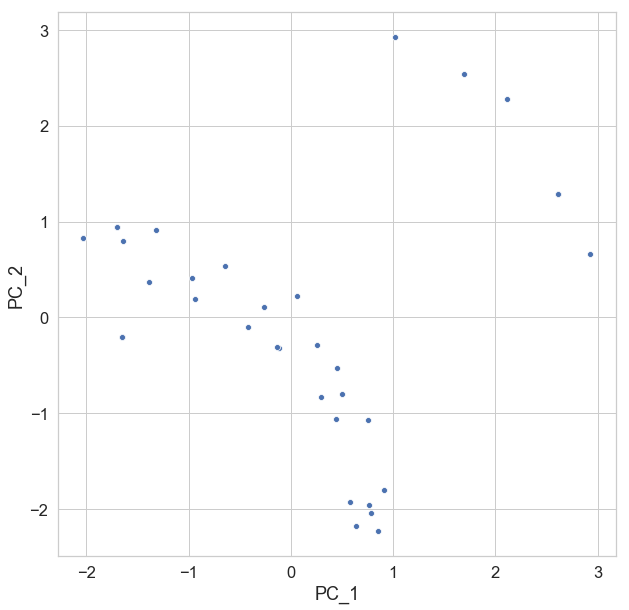

In [20]:
ax1 = sns.scatterplot(data=hba_crds_df,x="PC_1",y="PC_2")

In [21]:
var = np.sum(hba_pca.explained_variance_ratio_)
var

0.4060420938219368

40% variance for hba could do better

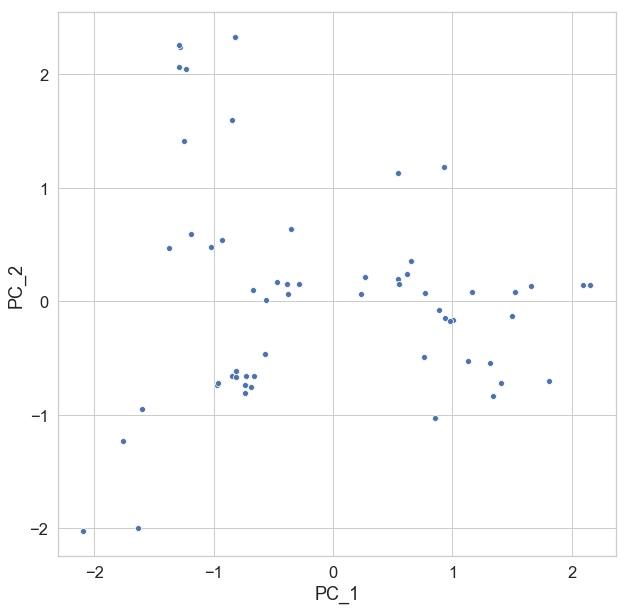

In [22]:
ax2 = sns.scatterplot(data=hbd_crds_df,x="PC_1",y="PC_2")

In [23]:
var = np.sum(hbd_pca.explained_variance_ratio_)
var

0.20928956090370204

Only 20% for HBD

We will see how the variance changes with number of components

In [24]:
def evaluate_components(fp_list):
    res = []
    for n_comp in tqdm(range(2,30)): #40 chosen because one of the datasets only has max 40 samples
        pca = PCA(n_components=n_comp)
        crds = pca.fit_transform(fp_list) 
        var = np.sum(pca.explained_variance_ratio_)
        res.append([n_comp,var])
    return res



100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 194.24it/s]


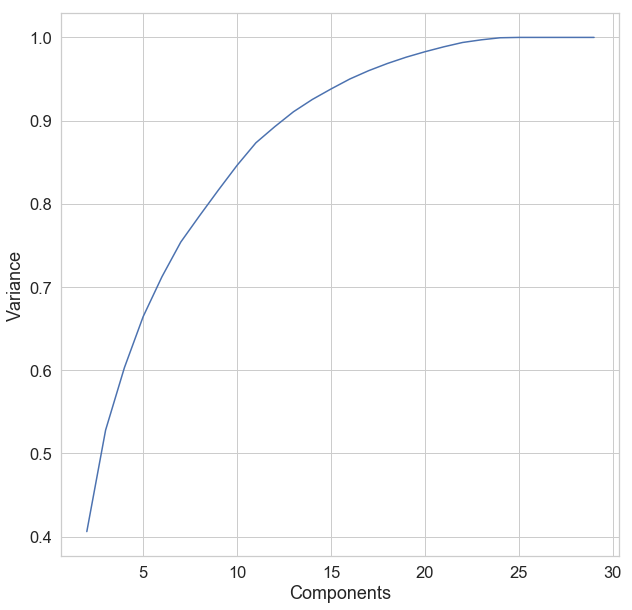

In [25]:
#HBA
# Run the function above on our fingerprint list
hba_comp_res = evaluate_components(hba_fp_list)

#Put these results into a dataframe
hba_res_df = pd.DataFrame(hba_comp_res,columns=["Components","Variance"])

#Make a line plot of the number of components vs the variance explained
ax = sns.lineplot(data=hba_res_df,x="Components",y="Variance")

Using 20 PC we can get about 95% variance, and use t-sne

In [43]:
hba_pca = PCA(n_components=25)
hba_crds = hba_pca.fit_transform(hba_fp_list)

In [44]:
from sklearn.manifold import TSNE
%time hba_crds_embedded = TSNE(n_components=2).fit_transform(hba_crds)

Wall time: 151 ms


In [45]:
#adding to df
hba_tsne_df = pd.DataFrame(hba_crds_embedded,columns=["X","Y"])
hba_tsne_df.head()

,X,Y
0,32.687828,9.181572
1,-41.204758,40.601913
2,0.621462,24.877851
3,-9.196517,44.006184
4,9.207545,-51.491863


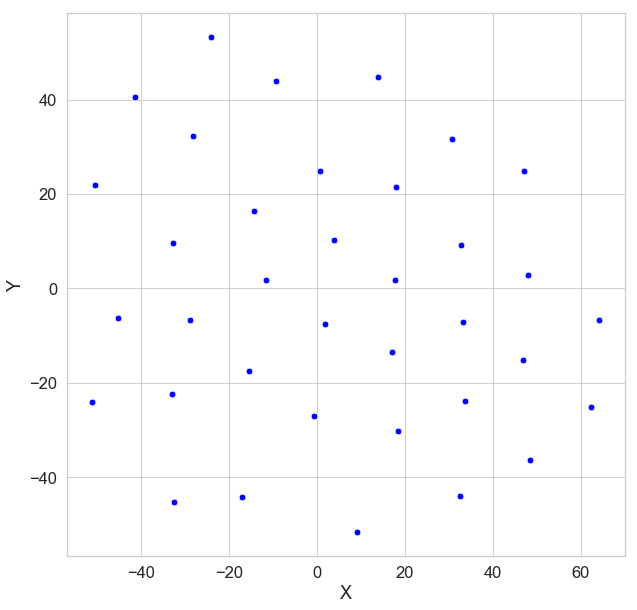

In [46]:
ax = sns.scatterplot(data=hba_tsne_df,x="X",y="Y", s = 45, color = "blue")

100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 132.79it/s]


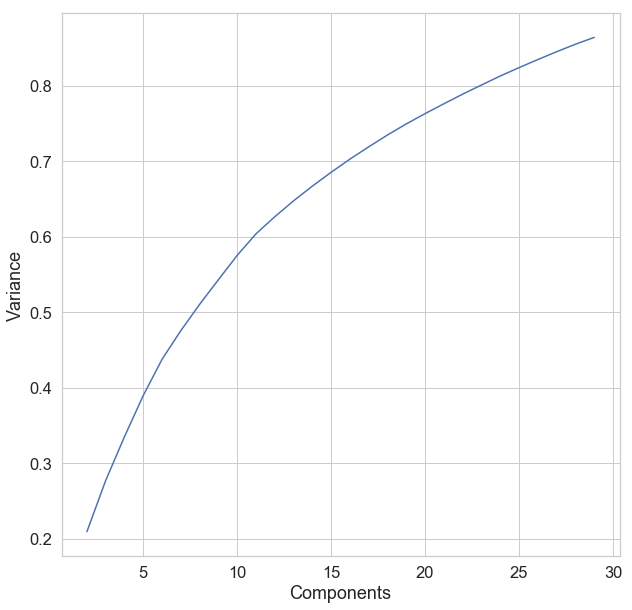

In [47]:
#HBD
# Run the function above on our fingerprint list
hbd_comp_res = evaluate_components(hbd_fp_list)

#Put these results into a dataframe
hbd_res_df = pd.DataFrame(hbd_comp_res,columns=["Components","Variance"])

#Make a line plot of the number of components vs the variance explained
ax = sns.lineplot(data=hbd_res_df,x="Components",y="Variance")

35 components should be good enough here

In [56]:
hbd_pca = PCA(n_components=35)
hbd_crds = hbd_pca.fit_transform(hbd_fp_list)

In [57]:
%time hbd_crds_embedded = TSNE(n_components=2).fit_transform(hbd_crds)

Wall time: 277 ms


In [58]:
hbd_tsne_df = pd.DataFrame(hbd_crds_embedded,columns=["X","Y"])
hbd_tsne_df.head()

,X,Y
0,5.566700,4.409859
1,-9.640171,19.869781
2,6.155630,-9.126834
3,-23.634943,5.787710
4,-12.703978,12.074471


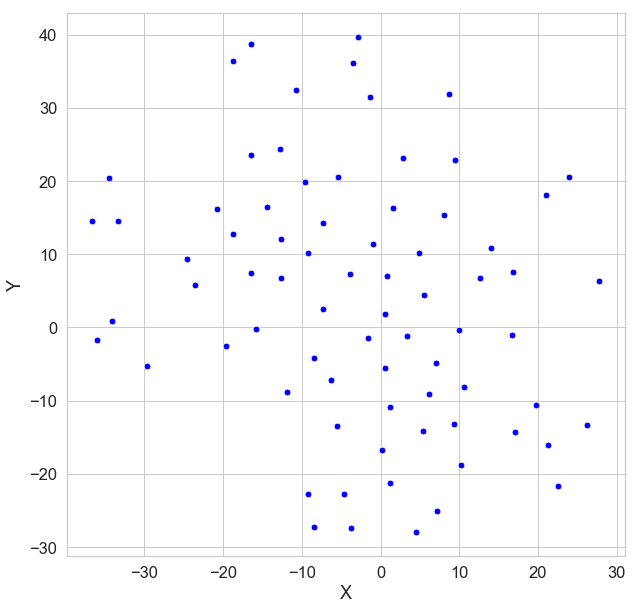

In [59]:
ax = sns.scatterplot(data=hbd_tsne_df,x="X",y="Y", s = 45, color = "blue")